In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
#importing file
churn = pd.read_csv(r"C:\Users\pedro\Desktop\Ironhack\customer_churn.csv")
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [88]:
print(churn.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [89]:
#changing variable TotalCharges to numeric
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'].replace(' ', pd.NA))
print(churn.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [90]:
#dropping customerID
churn=churn.drop(['customerID'],axis=1)

In [91]:
#checking null values
def null_percentage(df):
    total_null = df.isnull().sum()
    total_rows = len(df)
    percentage_null = (total_null / total_rows) * 100
    null_df = pd.DataFrame({
        'Total Null Values': total_null,
        'Percentage Null': percentage_null
    })
    
    null_df = null_df.sort_values(by='Percentage Null', ascending=False)
    return null_df

null_percentages = null_percentage(churn)
null_percentages

,Total Null Values,Percentage Null
TotalCharges,11,0.156183
gender,0,0.000000
SeniorCitizen,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


In [92]:
#TotalCharges has 0.16% null values, since is a very low amount, we drop it
churn = churn.dropna()

In [93]:
#changing churn values to 0 and 1
churn['Churn'] = churn['Churn'].replace({'Yes': 1, 'No': 0})

In [94]:
#one-hot encoding
churn_cat = churn.select_dtypes('object')
churn_cat = pd.get_dummies(churn_cat, dtype = int)
churn_cat

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
7039,1,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
7040,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [95]:
#numerical variables
churn_numerical = churn.select_dtypes('number')

In [96]:
churn_numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [97]:
#concatenating categorical and numerical
churn_all = pd.concat([churn_numerical, churn_cat], axis = 1).reset_index(drop = True)
churn_all

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7028,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7029,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7030,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [98]:
#value counts
churn_all['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [99]:
#applying SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = churn_all.drop(['Churn'], axis = 1)
Y = churn_all['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

sm = SMOTE(random_state = 0, sampling_strategy = 1.0)
X_train_SMOTE, Y_train_SMOTE = sm.fit_resample(X_train, Y_train)

Y_train_SMOTE.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [100]:
#logistic regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_SMOTE, Y_train_SMOTE)
result = model_lr.score(X_train_SMOTE, Y_train_SMOTE)
print("accuracy:", round(result,3))

accuracy: 0.847


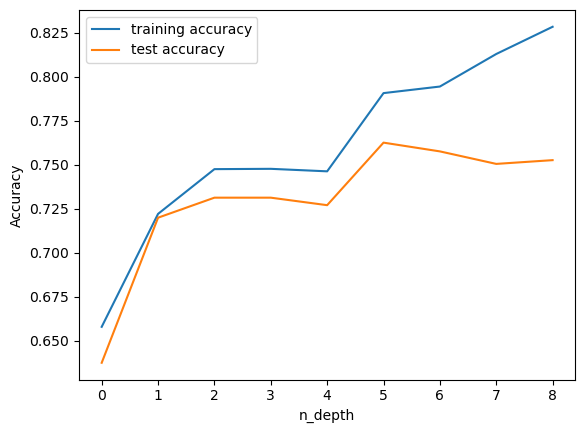

In [101]:
#decision tree
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

max_depth = range(1,10)
test = []
train = []
for depth in max_depth:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train_SMOTE, Y_train_SMOTE)
    test.append(model.score(X_test,Y_test))
    train.append(model.score(X_train,Y_train))
    
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

In [102]:
model_dt = DecisionTreeClassifier(max_depth = 3)
model_dt.fit (X_train_SMOTE, Y_train_SMOTE)
result = model_dt.score(X_train_SMOTE, Y_train_SMOTE)
print("accuracy", round(result,3))

accuracy 0.804


In [103]:
#applying TomekLinks
from imblearn.under_sampling import TomekLinks

X = churn_all.drop(['Churn'], axis = 1)
Y = churn_all['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model_tomek = TomekLinks()
X_train_tomek, Y_train_tomek = model_tomek.fit_resample(X_train, Y_train)

Y_train_tomek.value_counts()

Churn
0    3682
1    1495
Name: count, dtype: int64

In [104]:
#logistic regression
model_lr = LogisticRegression()
model_lr.fit(X_train_tomek, Y_train_tomek)
result = model_lr.score(X_train_tomek, Y_train_tomek)
print("accuracy:", round(result,3))

accuracy: 0.816


In [105]:
#decision tree
model_dt = DecisionTreeClassifier(max_depth = 4)
model_dt.fit (X_train_tomek, Y_train_tomek)
result = model_dt.score(X_train_tomek, Y_train_tomek)
print("accuracy", round(result,3))

accuracy 0.808
